# Time Series Decomposition

## Random Walk

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
value = 1.0

for i in range(1000):
    x.append(i)
    value += random.gauss(0.0, 1.0)
    y.append(value)

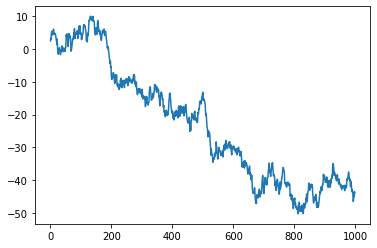

In [6]:
plt.plot(x,y)

# Trend

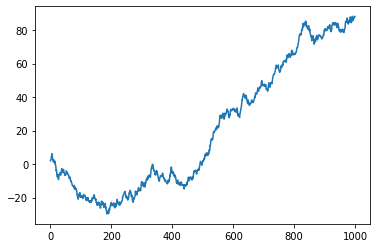

In [8]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
value = 1.0

for i in range(1000):
    x.append(i)
    value += 0.1 + random.gauss(0.0, 1.0)
    y.append(value)
    
plt.plot(x,y)

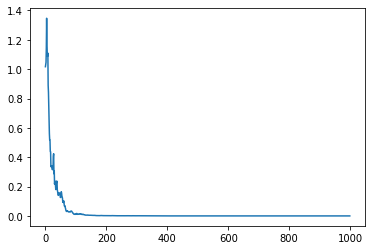

In [15]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
value = 1.0

for i in range(1000):
    x.append(i)
    value = value * (0.99+ random.gauss(0.0, 0.1))
    y.append(value)
    
plt.plot(x,y)

# Variability

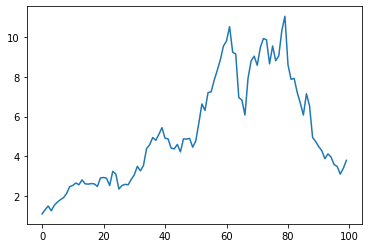

In [19]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
value = 1.0

for i in range(100):
    x.append(i)
    value += 0.1 + random.gauss(0.0, 1.0 * value/10)
    y.append(value)
    
plt.plot(x,y)

# Seasonability

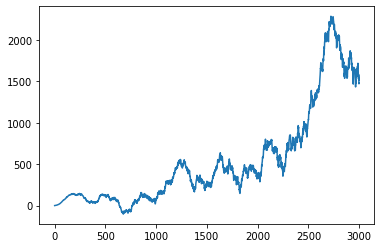

In [26]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
value = 1.0

for i in range(3000):
    x.append(i)
    value += math.sin(i / 180 * math.pi) + 0.1 + random.gauss(0.0, 1.0 * i/100)
    y.append(value)
    
plt.plot(x,y)

# Decomposition

In [34]:
import seaborn as sns
df = sns.load_dataset('flights')

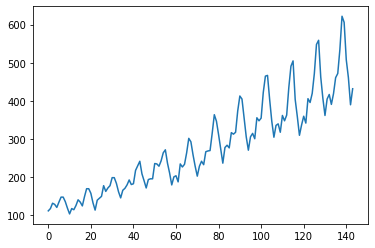

In [36]:
df['passengers'].plot()

In [37]:
df['diff'] = df['passengers'].diff()

In [38]:
df.head()

,year,month,passengers,diff
0,1949,January,112,NaN
1,1949,February,118,6.0
2,1949,March,132,14.0
3,1949,April,129,-3.0
4,1949,May,121,-8.0


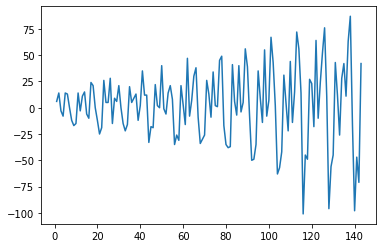

In [39]:
df['diff'].plot()

In [40]:
df['diff'].mean() # average increase in passengers per month

2.237762237762238

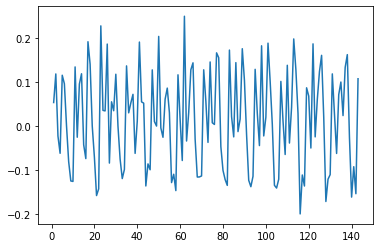

In [42]:
df['pct'] = df['passengers'].pct_change()
df['pct'].plot()

In [44]:
months = df.groupby('month')['pct'].mean()
months

month
January      0.025745
February    -0.010453
March        0.151735
April       -0.020056
May          0.008571
June         0.142526
July         0.121226
August       0.001147
September   -0.125067
October     -0.120018
November    -0.124927
December     0.132474
Name: pct, dtype: float64

In [48]:
month_means = list(months.values)*12

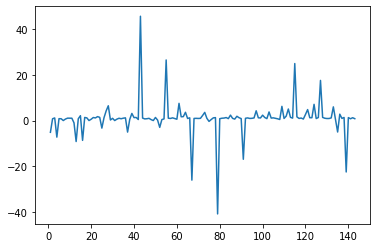

In [50]:
df['unseasoned'] = df['pct'] / month_means
df['unseasoned'].plot()

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

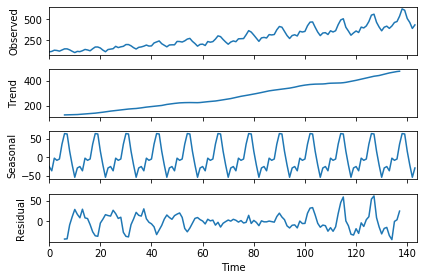

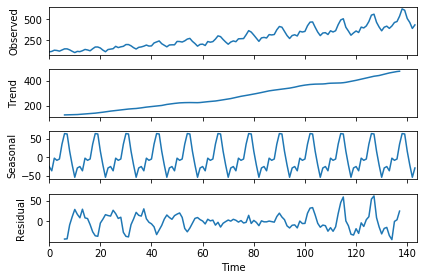

In [57]:
sdr = seasonal_decompose(df['passengers'].values, freq=12, model='additive')
sdr.plot()